**Prática de Segmentação de imagens**

In [12]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

1) Faça a plotagem do histograma da imagem, observando o histograma, escolha um valor para definir um threshold

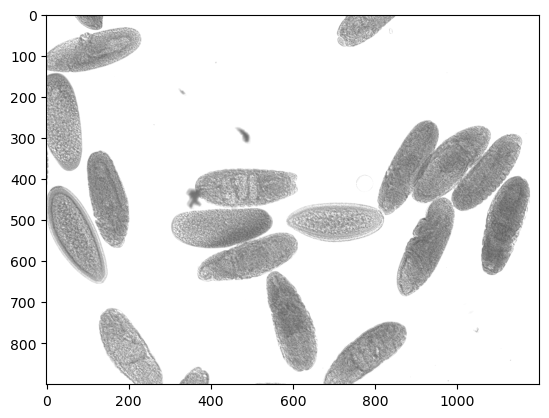

In [13]:
img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255);


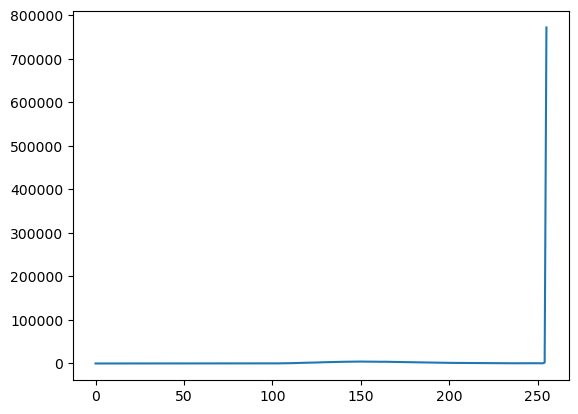

In [14]:
histg = cv2.calcHist([img1],[0],None,[256],[0,256])  
plt.plot(histg) 


# TreshHold

De olho, eu escolheria um treshold de aproximadamente 150


In [15]:
img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

In [16]:
mean_value = np.mean(img1)
print(mean_value)
while mean_value<255//2:

    smaller_mask = img1 < mean_value
    larger_mask = img1 > mean_value

    image_smaller = np.zeros_like(img1)
    image_larger = np.zeros_like(img1)

    image_smaller[smaller_mask] = img1[smaller_mask]
    image_larger[larger_mask] = img1[larger_mask]
    mean_value = (np.mean(image_larger)-np.mean(image_smaller))//2
    print(mean_value)
print(mean_value)

228.95235185185186
228.95235185185186


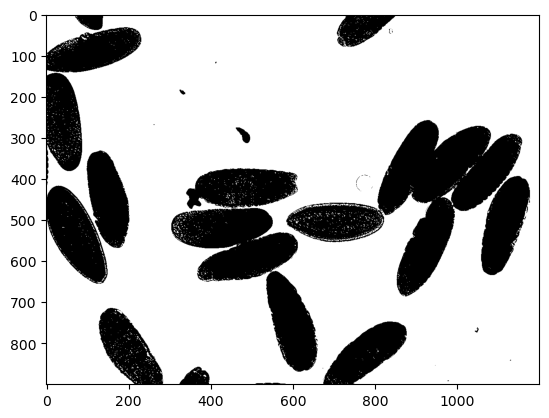

In [17]:
import numpy as np
import cv2


threshold = 228

output_image = np.where(img1 > threshold, 255, 0).astype(np.uint8)

plt.imshow(output_image, cmap='gray', vmin=0, vmax=255);

2)	Segmentação utilizando a técnica de Threshold Adaptativo (implementar o algortimo). Faça a aplicação do Threshold com e sem suavização prévia

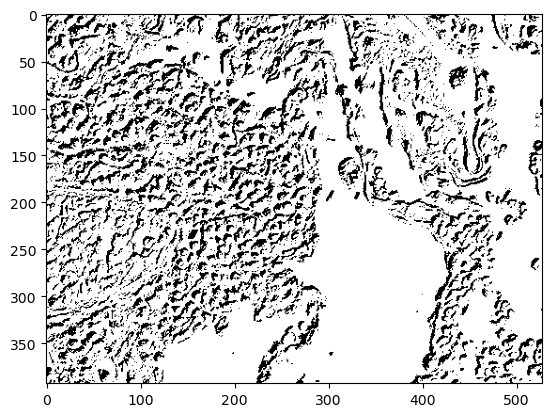

In [18]:
import numpy as np
import cv2

block_size = 2 
C = 5 

kernel = np.ones((block_size, block_size), np.float32) / (block_size ** 2)
local_mean = cv2.filter2D(image, -1, kernel)

threshold = local_mean - C

output_image_2 = np.where(image > threshold, 255, 0).astype(np.uint8)

plt.imshow(output_image_2, cmap='gray', vmin=0, vmax=255);


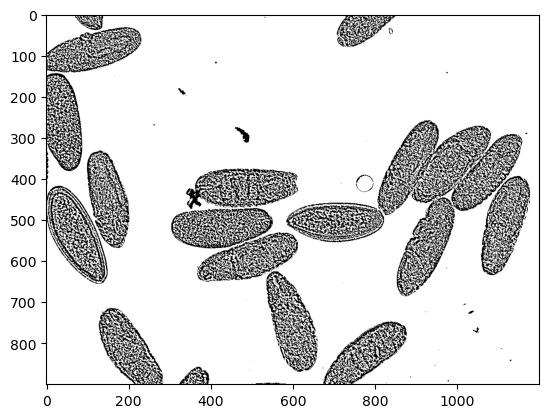

In [19]:
img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255);
th2 = cv2.adaptiveThreshold(img1,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
cv2.THRESH_BINARY,11,2)

plt.imshow(th2, cmap='gray', vmin=0, vmax=255);

3) Segmentação utilizando a técnica de Otsu (implementar) . Faça a aplicação do Threshold com e sem suavização prévia. Mostre um gráfico com o histograma juntamente com a variância entre classes (Exemplo: https://en.wikipedia.org/wiki/File:Otsu%27s_Method_Visualization.gif)

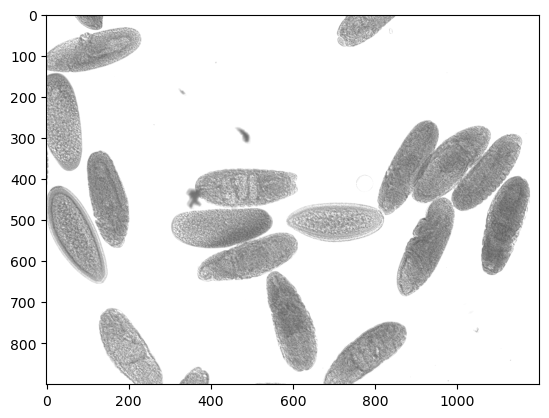

In [20]:
img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255);

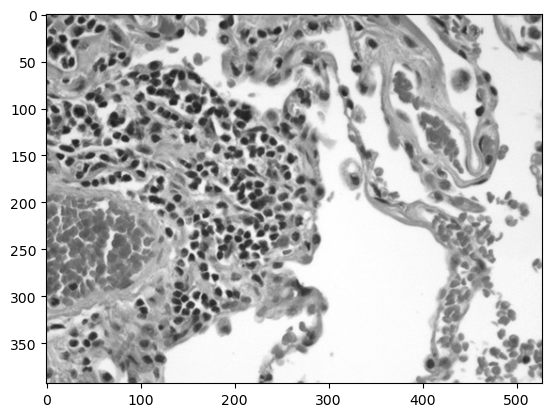

In [ ]:
img1 = cv2.imread("HE.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255);

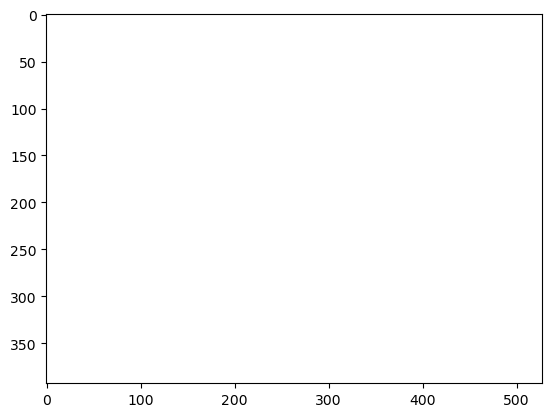

In [32]:
import cv2
import numpy as np

# Load the image in grayscale
image = cv2.imread('HE.jpg', 0)

# Calculate histogram
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# Calculate total number of pixels
total_pixels = image.size

# Initialize variables to keep track of best threshold and best variance
best_threshold = 0
best_variance = 0
# inter_class_variances = np.zeros((256, 1))

# Iterate through all possible threshold values
for threshold in range(256):
    # Calculate the number of pixels below and above the threshold
    below_threshold = np.sum(histogram[:threshold])
    above_threshold = np.sum(histogram[threshold:])

    # Calculate the probabilities of the two classes
    prob_below = below_threshold / total_pixels
    prob_above = above_threshold / total_pixels

    # Calculate the means of the two classes
    mean_below = np.sum(np.arange(threshold) * histogram[:threshold]) / (below_threshold + 1e-9)
    mean_above = np.sum(np.arange(threshold, 256) * histogram[threshold:]) / (above_threshold + 1e-9)

    # Calculate the between-class variance
    between_class_variance = prob_below * prob_above * (mean_below - mean_above) ** 2

    # Store the inter-class variance for this threshold
    # inter_class_variances[threshold] = between_class_variance

# Apply the best threshold to the image
otsu_result = (image > best_threshold) * 255

plt.imshow(otsu_result, cmap='gray', vmin=0, vmax=255);
# Display or save the thresholded image
# cv2.imshow('Otsu Thresholded Image', otsu_result)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


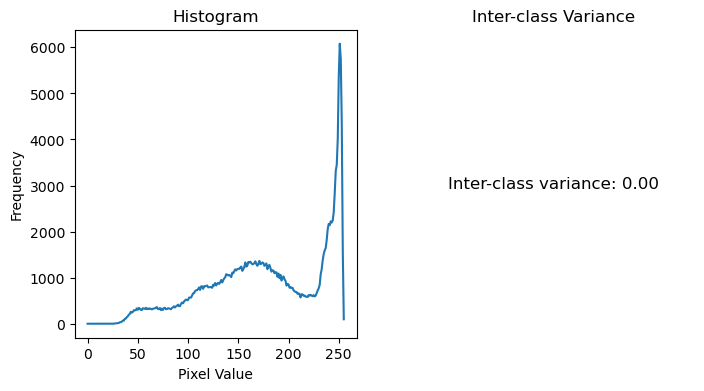

In [29]:
# Plot the histogram
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.title('Histogram')
plt.plot(histogram)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Display the inter-class variance
plt.subplot(122)
plt.title('Inter-class Variance')
plt.text(0.5, 0.5, f'Inter-class variance: {best_variance:.2f}', ha='center', va='center', fontsize=12)
plt.axis('off')

plt.show()

Text(0, 0.5, 'Inter-class Variance')

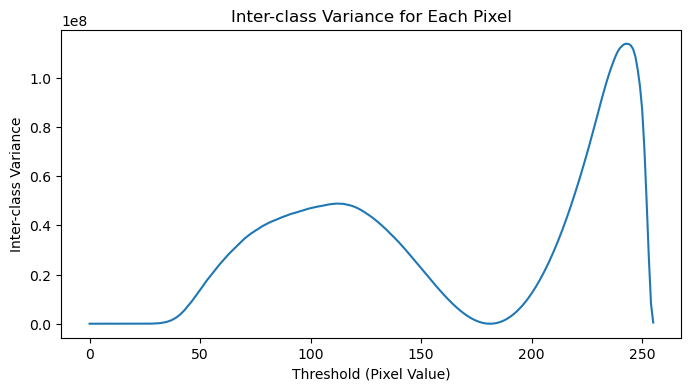

In [30]:

plt.figure(figsize=(8, 4))
plt.title('Inter-class Variance for Each Pixel')
plt.plot(inter_class_variances)
plt.xlabel('Threshold (Pixel Value)')
plt.ylabel('Inter-class Variance')


4)	Aplique o Otsu para a imagem HE.jpg, madrill.tiff e  Lenna.jpg (use antes a conversão da imagem para tons de cinza)